In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Data prep

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('c_nc_dataset_lung_upd.dat', sep=' ')
batch = df.pop('Batch')
df

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
GSM475656.CEL.gz,5.586236,4.839204,6.698823,10.266449,8.428606,4.753824,6.322307,5.161743,3.168844,8.405834,...,10.868557,8.143068,9.783587,10.220341,7.492394,10.363529,4.414772,8.542904,6.634841,8.214235
GSM475657.CEL.gz,5.348438,4.951239,6.417037,5.354261,7.665292,4.638541,6.625806,4.470107,3.866943,7.328171,...,11.199752,8.817667,10.347081,9.983936,8.959172,10.510589,4.705446,8.627088,6.546790,7.677993
GSM475658.CEL.gz,5.359704,4.731931,6.346919,5.548378,7.946886,4.785639,7.145944,4.462794,4.000829,7.703640,...,11.174870,8.442528,10.352025,9.788790,8.581992,10.465604,4.513753,8.482887,6.484891,7.568870
GSM475659.CEL.gz,5.610359,4.891792,6.728211,5.359504,7.955000,4.547394,6.853951,4.518934,4.241882,7.551909,...,10.735481,8.755502,10.136881,9.882075,8.627012,10.585313,4.918601,8.643936,6.803963,7.535816
GSM475660.CEL.gz,5.317533,4.617638,5.945205,5.178828,7.538778,4.733070,6.802228,4.737122,3.242377,8.110353,...,10.825494,7.731828,10.085310,10.145611,8.832228,10.465604,5.017469,8.906400,6.253132,8.253355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1235107_Tumor39.CEL.gz,5.429884,4.521640,7.203250,5.736143,8.901988,4.765438,7.382132,4.708960,3.771521,8.378813,...,10.558399,8.649003,10.092200,10.636194,9.082943,10.740282,4.723698,8.883733,6.609446,8.234930
GSM1235108_Normal40.CEL.gz,5.098594,4.460010,6.209769,4.803034,7.702724,4.865334,7.697576,4.587840,4.441774,7.474126,...,11.155002,8.314701,10.279301,11.213295,8.790956,10.399449,4.880408,8.732740,7.283279,7.643962
GSM1235109_Tumor40.CEL.gz,5.977939,4.279410,6.975969,6.585523,8.000001,4.741230,7.239722,4.504914,3.499071,7.670252,...,10.633165,9.110384,9.695217,7.999898,8.338399,10.419751,4.737261,8.205959,8.075586,8.092331
GSM1235110_Normal41.CEL.gz,5.295056,4.397992,6.537137,4.774255,7.816414,4.832853,7.468246,4.504914,3.717190,7.544001,...,10.990521,8.255318,10.532243,11.457497,8.889621,10.568062,4.864850,8.831999,7.258206,7.564083


In [4]:
label_arr = []

# 19188 labels
with open('19188_txt.txt', 'r') as f:
    for line in f:
        c = line[-2]
        if c == 'u' or c == 'T':
            label_arr.append(1)
        else:
            label_arr.append(0)

# 19804 labels
label_arr += [1] * 60
label_arr += [0] * 60

# 27262 labels
# sample nos. 1, 3, etc. are healthy (0); 2, 4, etc. are cancerous (1) (adjusted here for 0 indexing)
label_arr += [i % 2 for i in range(50)]

# 51024 labels
with open('51024_txt.txt', 'r') as f:
    for line in f:
        if 'Normal' in line:
            label_arr.append(0)
        else:
            label_arr.append(1)

label_arr = np.array(label_arr)

In [5]:
corr = df.corr().abs()
corr

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
1,1.000000,0.033990,0.276657,0.280774,0.050865,0.168659,0.178622,0.203028,0.283581,0.179586,...,0.190530,0.137643,0.195695,0.169365,0.138390,0.071628,0.071801,0.050749,0.270484,0.169746
10,0.033990,1.000000,0.103081,0.051313,0.097391,0.122064,0.080801,0.012242,0.015422,0.050926,...,0.054495,0.148950,0.139198,0.076188,0.018228,0.041840,0.247439,0.082868,0.128805,0.080383
100,0.276657,0.103081,1.000000,0.261851,0.161938,0.059413,0.010209,0.066229,0.117617,0.126977,...,0.012682,0.014529,0.096546,0.298955,0.007867,0.135068,0.092820,0.167868,0.033447,0.307280
1000,0.280774,0.051313,0.261851,1.000000,0.339078,0.105005,0.026796,0.079761,0.072596,0.002100,...,0.090401,0.077930,0.205836,0.287475,0.107452,0.013663,0.050092,0.028767,0.076522,0.101135
10000,0.050865,0.097391,0.161938,0.339078,1.000000,0.088664,0.167369,0.212864,0.333854,0.207540,...,0.163776,0.026454,0.001642,0.407244,0.125864,0.141217,0.096074,0.228927,0.215949,0.244219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0.071628,0.041840,0.135068,0.013663,0.141217,0.068279,0.179545,0.043794,0.176608,0.027254,...,0.047768,0.054821,0.065129,0.240449,0.169193,1.000000,0.127595,0.068801,0.007446,0.158232
9992,0.071801,0.247439,0.092820,0.050092,0.096074,0.172453,0.088377,0.153257,0.172787,0.119711,...,0.014366,0.084032,0.139592,0.077753,0.109603,0.127595,1.000000,0.094109,0.213404,0.028999
9993,0.050749,0.082868,0.167868,0.028767,0.228927,0.043154,0.287468,0.151166,0.061595,0.040647,...,0.080699,0.002813,0.131831,0.231077,0.018426,0.068801,0.094109,1.000000,0.181117,0.015691
9994,0.270484,0.128805,0.033447,0.076522,0.215949,0.178752,0.556499,0.350518,0.234824,0.018174,...,0.019644,0.379642,0.040387,0.049973,0.113597,0.007446,0.213404,0.181117,1.000000,0.221822


In [6]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
upper

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
1,NaN,0.03399,0.276657,0.280774,0.050865,0.168659,0.178622,0.203028,0.283581,0.179586,...,0.190530,0.137643,0.195695,0.169365,0.138390,0.071628,0.071801,0.050749,0.270484,0.169746
10,NaN,NaN,0.103081,0.051313,0.097391,0.122064,0.080801,0.012242,0.015422,0.050926,...,0.054495,0.148950,0.139198,0.076188,0.018228,0.041840,0.247439,0.082868,0.128805,0.080383
100,NaN,NaN,NaN,0.261851,0.161938,0.059413,0.010209,0.066229,0.117617,0.126977,...,0.012682,0.014529,0.096546,0.298955,0.007867,0.135068,0.092820,0.167868,0.033447,0.307280
1000,NaN,NaN,NaN,NaN,0.339078,0.105005,0.026796,0.079761,0.072596,0.002100,...,0.090401,0.077930,0.205836,0.287475,0.107452,0.013663,0.050092,0.028767,0.076522,0.101135
10000,NaN,NaN,NaN,NaN,NaN,0.088664,0.167369,0.212864,0.333854,0.207540,...,0.163776,0.026454,0.001642,0.407244,0.125864,0.141217,0.096074,0.228927,0.215949,0.244219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.127595,0.068801,0.007446,0.158232
9992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094109,0.213404,0.028999
9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.181117,0.015691
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221822


In [7]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
len(to_drop)

636

In [8]:
df.drop(to_drop, axis=1, inplace=True)
df

,1,10,100,1000,10000,100009676,10001,10002,10003,100037417,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
GSM475656.CEL.gz,5.586236,4.839204,6.698823,10.266449,8.428606,4.753824,6.322307,5.161743,3.168844,8.405834,...,10.868557,8.143068,9.783587,10.220341,7.492394,10.363529,4.414772,8.542904,6.634841,8.214235
GSM475657.CEL.gz,5.348438,4.951239,6.417037,5.354261,7.665292,4.638541,6.625806,4.470107,3.866943,7.328171,...,11.199752,8.817667,10.347081,9.983936,8.959172,10.510589,4.705446,8.627088,6.546790,7.677993
GSM475658.CEL.gz,5.359704,4.731931,6.346919,5.548378,7.946886,4.785639,7.145944,4.462794,4.000829,7.703640,...,11.174870,8.442528,10.352025,9.788790,8.581992,10.465604,4.513753,8.482887,6.484891,7.568870
GSM475659.CEL.gz,5.610359,4.891792,6.728211,5.359504,7.955000,4.547394,6.853951,4.518934,4.241882,7.551909,...,10.735481,8.755502,10.136881,9.882075,8.627012,10.585313,4.918601,8.643936,6.803963,7.535816
GSM475660.CEL.gz,5.317533,4.617638,5.945205,5.178828,7.538778,4.733070,6.802228,4.737122,3.242377,8.110353,...,10.825494,7.731828,10.085310,10.145611,8.832228,10.465604,5.017469,8.906400,6.253132,8.253355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1235107_Tumor39.CEL.gz,5.429884,4.521640,7.203250,5.736143,8.901988,4.765438,7.382132,4.708960,3.771521,8.378813,...,10.558399,8.649003,10.092200,10.636194,9.082943,10.740282,4.723698,8.883733,6.609446,8.234930
GSM1235108_Normal40.CEL.gz,5.098594,4.460010,6.209769,4.803034,7.702724,4.865334,7.697576,4.587840,4.441774,7.474126,...,11.155002,8.314701,10.279301,11.213295,8.790956,10.399449,4.880408,8.732740,7.283279,7.643962
GSM1235109_Tumor40.CEL.gz,5.977939,4.279410,6.975969,6.585523,8.000001,4.741230,7.239722,4.504914,3.499071,7.670252,...,10.633165,9.110384,9.695217,7.999898,8.338399,10.419751,4.737261,8.205959,8.075586,8.092331
GSM1235110_Normal41.CEL.gz,5.295056,4.397992,6.537137,4.774255,7.816414,4.832853,7.468246,4.504914,3.717190,7.544001,...,10.990521,8.255318,10.532243,11.457497,8.889621,10.568062,4.864850,8.831999,7.258206,7.564083


In [9]:
rfe_pre = RFE(estimator=RandomForestClassifier(), n_features_to_select=300, step=.01, verbose=1)
selector_pre = rfe_pre.fit(df, label_arr)

Fitting estimator with 18720 features.
Fitting estimator with 18533 features.
Fitting estimator with 18346 features.
Fitting estimator with 18159 features.
Fitting estimator with 17972 features.
Fitting estimator with 17785 features.
Fitting estimator with 17598 features.
Fitting estimator with 17411 features.
Fitting estimator with 17224 features.
Fitting estimator with 17037 features.
Fitting estimator with 16850 features.
Fitting estimator with 16663 features.
Fitting estimator with 16476 features.
Fitting estimator with 16289 features.
Fitting estimator with 16102 features.
Fitting estimator with 15915 features.
Fitting estimator with 15728 features.
Fitting estimator with 15541 features.
Fitting estimator with 15354 features.
Fitting estimator with 15167 features.
Fitting estimator with 14980 features.
Fitting estimator with 14793 features.
Fitting estimator with 14606 features.
Fitting estimator with 14419 features.
Fitting estimator with 14232 features.
Fitting estimator with 14

In [10]:
filtered_df_pre = df.loc[:, selector_pre.support_]

In [11]:
rfe50 = RFE(estimator=RandomForestClassifier(), n_features_to_select=50)
selector50 = rfe50.fit(filtered_df_pre, label_arr)

In [12]:
filtered_df_50 = filtered_df_pre.loc[:, selector50.support_]
filtered_df_50_arr = np.array(filtered_df_50)

In [13]:
rfe20 = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)
selector20 = rfe20.fit(filtered_df_50, label_arr)

In [14]:
filtered_df_20 = filtered_df_50.loc[:, selector20.support_]
filtered_df_20_arr = np.array(filtered_df_20)

# Simple classifiers

In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
    decision_tree_acc.append(np.mean(cv))
decision_tree_acc

[0.912156862745098,
 0.9027731092436975,
 0.9312885154061623,
 0.9099999999999999,
 0.9075350140056022,
 0.8980952380952381,
 0.9099439775910364,
 0.8979831932773109,
 0.907563025210084,
 0.9099719887955182,
 0.9028291316526611,
 0.9194397759103641,
 0.8957422969187675,
 0.9171148459383753,
 0.9099159663865546,
 0.917142857142857,
 0.9146218487394957,
 0.9194117647058823]

In [17]:
decision_tree_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
    decision_tree_acc.append(np.mean(cv))
decision_tree_acc

[0.9050140056022409,
 0.9074509803921569,
 0.9121848739495798,
 0.9240616246498599,
 0.9074229691876751,
 0.9193277310924369,
 0.9216526610644257,
 0.9192997198879551,
 0.9168627450980391,
 0.9192997198879551,
 0.9145378151260504,
 0.9026330532212885,
 0.9074509803921569,
 0.9122128851540616,
 0.912156862745098,
 0.909859943977591,
 0.9073949579831933,
 0.9074229691876751]

## Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
    random_forest_acc.append(np.mean(cv))
random_forest_acc

[0.9573109243697479,
 0.964453781512605,
 0.964453781512605,
 0.959719887955182,
 0.9596918767507002,
 0.9691876750700279,
 0.9668067226890755,
 0.9596918767507002,
 0.9668347338935573,
 0.9620448179271708,
 0.964453781512605,
 0.9692156862745097,
 0.964453781512605,
 0.964453781512605,
 0.9715686274509803,
 0.964453781512605,
 0.9620728291316526,
 0.964453781512605]

In [19]:
random_forest_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=max_depth))
    cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
    random_forest_acc.append(np.mean(cv))
random_forest_acc

[0.9596918767507002,
 0.9644257703081232,
 0.9644257703081232,
 0.9620168067226892,
 0.9620448179271708,
 0.9596638655462184,
 0.9596638655462184,
 0.9620728291316526,
 0.9644257703081232,
 0.9644257703081232,
 0.9596638655462184,
 0.9620448179271708,
 0.9644257703081232,
 0.9620448179271708,
 0.9644257703081232,
 0.9644257703081232,
 0.9644257703081232,
 0.9620448179271708]

## SVC

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
params = [{'svc__C':[10**x for x in range(-2, 10)], 'svc__gamma':[10**x for x in range(-5, 4)]}]
clf = GridSearchCV(pipeline, params)
clf.fit(filtered_df_20_arr, label_arr)
clf.best_params_

{'svc__C': 1, 'svc__gamma': 0.1}

In [21]:
clf = make_pipeline(StandardScaler(), SVC(C=clf.best_params_['svc__C'], gamma=clf.best_params_['svc__gamma']))
cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
np.mean(cv)

0.9691876750700279

In [22]:
pipeline = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
params = [{'svc__C':[10**x for x in range(-2, 10)], 'svc__gamma':[10**x for x in range(-5, 4)]}]
clf = GridSearchCV(pipeline, params)
clf.fit(filtered_df_50_arr, label_arr)
clf.best_params_

{'svc__C': 1, 'svc__gamma': 0.0001}

In [23]:
clf = make_pipeline(StandardScaler(), SVC(C=clf.best_params_['svc__C'], gamma=clf.best_params_['svc__gamma']))
cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
np.mean(cv)

0.9691876750700279

## XGBoost

In [24]:
import xgboost as xgb

xgb_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', max_depth=max_depth))
    params={'objective':'binary:logistic'}
    cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
    xgb_acc.append(np.mean(cv))
xgb_acc

[0.9668347338935573,
 0.964453781512605,
 0.9620728291316526,
 0.9620728291316526,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002,
 0.9596918767507002]

In [25]:
xgb_acc = []
for max_depth in range(2, 20):
    clf = make_pipeline(StandardScaler(), xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', max_depth=max_depth))
    params={'objective':'binary:logistic'}
    cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
    xgb_acc.append(np.mean(cv))
xgb_acc

[0.9620448179271708,
 0.957282913165266,
 0.9596638655462184,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479,
 0.9573109243697479]

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_acc = []
for neighbors in range(1, 20):
    clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=neighbors))
    cv = cross_val_score(clf, filtered_df_20, label_arr, cv=StratifiedKFold())
    knn_acc.append(np.mean(cv))
knn_acc

[0.9668067226890755,
 0.9692156862745097,
 0.9692156862745097,
 0.9692156862745097,
 0.9668347338935573,
 0.964453781512605,
 0.964453781512605,
 0.964453781512605,
 0.9668347338935573,
 0.9668347338935573,
 0.9668347338935573,
 0.9668347338935573,
 0.9668347338935573,
 0.9668347338935573,
 0.9668347338935573,
 0.9668347338935573,
 0.9668347338935573,
 0.9668347338935573,
 0.9668347338935573]

In [27]:
knn_acc = []
for neighbors in range(1, 20):
    clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=neighbors))
    cv = cross_val_score(clf, filtered_df_50, label_arr, cv=StratifiedKFold())
    knn_acc.append(np.mean(cv))
knn_acc

[0.9668067226890755,
 0.9739495798319329,
 0.9715686274509803,
 0.9715686274509803,
 0.9715686274509803,
 0.9715686274509803,
 0.9715686274509803,
 0.9691876750700279,
 0.9668067226890755,
 0.9691876750700279,
 0.9668067226890755,
 0.9668067226890755,
 0.9668067226890755,
 0.9668067226890755,
 0.9668067226890755,
 0.9668067226890755,
 0.9668067226890755,
 0.9668067226890755,
 0.9668067226890755]

# MLP improved

### 20 features

In [28]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=20))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=4)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(hp.Choice('drop_' + str(i), values=[.0, .1, .2, .3])))
    model.add(Dense(1))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    learning_rate=hp.Choice('learning_rate', values=[.01, .001, .0001])
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [29]:
import keras_tuner as kt
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from keras.utils import to_categorical
from keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(filtered_df_20_arr, label_arr, test_size=.2)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=20, factor=3, directory='kt_test20', overwrite=False)
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_split=.2, callbacks=[stop_early])

Using TensorFlow backend


2024-05-16 20:04:10.364124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 20:04:10.917947: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Reloading Tuner from kt_test20/untitled_project/tuner0.json


In [30]:
best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

2024-05-16 20:04:11.709932: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 20:04:11.729095: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 20:04:11.729719: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 20:04:11.731886: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-16 20:04:11.732390: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                2016      
                                                                 
 batch_normalization (BatchN  (None, 96)               384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 96)                0         
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 108)               10476     
                                                                 
 batch_normalization_1 (Batc  (None, 108)              432       
 hNormalization)                                        

In [31]:
history = model.fit(X_train, y_train, epochs=50, validation_split=.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(best_epoch)

Epoch 1/50
9/9 [==============================] - 1s 44ms/step - loss: 0.5211 - accuracy: 0.7881 - val_loss: 0.3968 - val_accuracy: 0.9412
Epoch 2/50
9/9 [==============================] - 0s 24ms/step - loss: 0.3913 - accuracy: 0.9145 - val_loss: 0.3397 - val_accuracy: 0.9412
Epoch 3/50
9/9 [==============================] - 0s 24ms/step - loss: 0.3778 - accuracy: 0.9405 - val_loss: 0.3396 - val_accuracy: 0.9412
Epoch 4/50
9/9 [==============================] - 0s 26ms/step - loss: 0.3653 - accuracy: 0.9703 - val_loss: 0.3511 - val_accuracy: 0.9412
Epoch 5/50
9/9 [==============================] - 0s 25ms/step - loss: 0.3662 - accuracy: 0.9591 - val_loss: 0.3643 - val_accuracy: 0.9412
Epoch 6/50
9/9 [==============================] - 0s 25ms/step - loss: 0.3633 - accuracy: 0.9591 - val_loss: 0.3738 - val_accuracy: 0.9412
Epoch 7/50
9/9 [==============================] - 0s 25ms/step - loss: 0.3507 - accuracy: 0.9628 - val_loss: 0.3802 - val_accuracy: 0.9412
Epoch 8/50
9/9 [===========

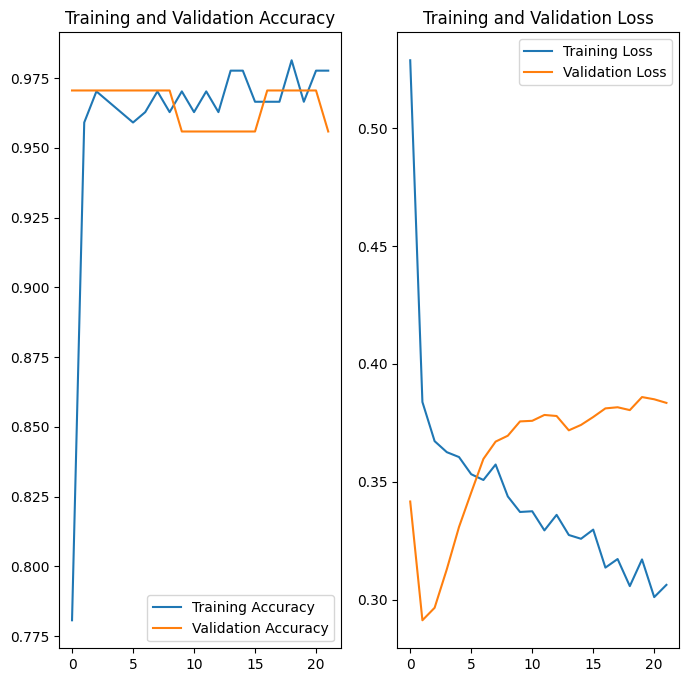

In [32]:
best_epoch = 20 if best_epoch < 20 else best_epoch

hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(best_epoch)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

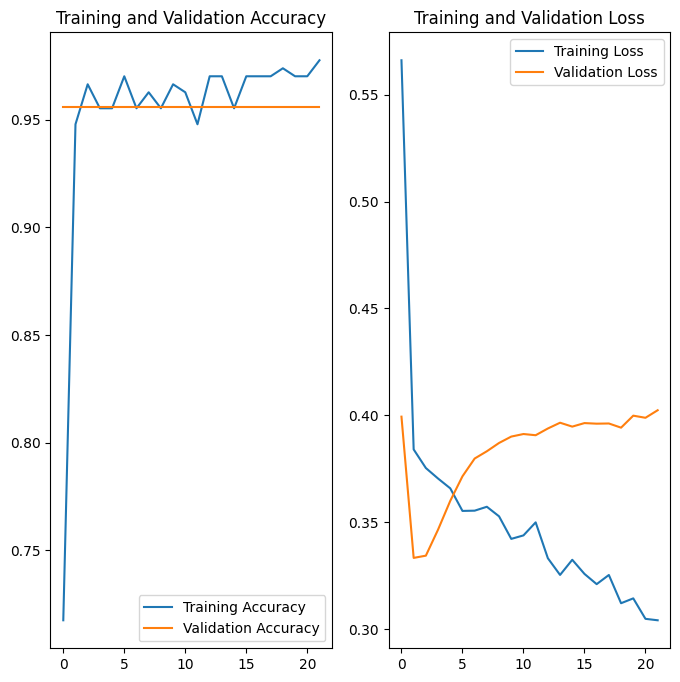

In [33]:
hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(best_epoch)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [34]:
hypermodel.evaluate(X_test, y_test)

3/3 [==============================] - 0s 8ms/step - loss: 0.3867 - accuracy: 0.9882


[0.38672664761543274, 0.9882352948188782]

In [35]:
from sklearn.model_selection import KFold

nn_acc=[]
for train, test in KFold(shuffle=True).split(filtered_df_20_arr, label_arr):
    X_train = filtered_df_20_arr[train]
    X_test = filtered_df_20_arr[test]
    y_train = label_arr[train]
    y_test = label_arr[test]
    hypermodel = tuner.hypermodel.build(best_hps)
    hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)
    nn_acc.append(hypermodel.evaluate(X_test, y_test)[1])
print(np.mean(nn_acc))

3/3 [==============================] - 0s 9ms/step - loss: 0.3724 - accuracy: 0.9524
0.940616250038147


In [36]:
from sklearn.model_selection import KFold

for rep in range(4):
    print('Training data repeats: ', rep)
    nn_acc=[]
    for train, test in KFold(shuffle=True).split(filtered_df_20_arr, label_arr):
        train_rep = np.array(train)
        for i in range(rep):
            train_rep = np.append(train_rep, train)
        ss = StandardScaler()
        rX_train = filtered_df_20_arr[train_rep]
        rX_test = filtered_df_20_arr[test]
        ss.fit(rX_train)
        rX_train = ss.transform(rX_train)
        rX_test = ss.transform(rX_test)
        ry_train = label_arr[train_rep]
        ry_test = label_arr[test]
        hypermodel = tuner.hypermodel.build(best_hps)
        hypermodel.fit(rX_train, ry_train, epochs=best_epoch, validation_split=.2, verbose=0)
        nn_acc.append(hypermodel.evaluate(rX_test, ry_test)[1])
    print(np.mean(nn_acc))

Training data repeats:  0
3/3 [==============================] - 0s 9ms/step - loss: 0.4026 - accuracy: 0.9762
0.9715686202049255
Training data repeats:  1
3/3 [==============================] - 0s 8ms/step - loss: 0.3401 - accuracy: 0.9643
0.9668347358703613
Training data repeats:  2
3/3 [==============================] - 0s 9ms/step - loss: 0.3002 - accuracy: 0.9405
0.9691036343574524
Training data repeats:  3
3/3 [==============================] - 0s 10ms/step - loss: 0.2288 - accuracy: 0.9762
0.9692156791687012


In [37]:
import keras.backend as K
print(hypermodel.layers[3].rate, hypermodel.layers[7].rate, K.eval(hypermodel.optimizer.lr))

0.2 0.0 0.001


### 50 features

In [38]:
def build_model50(hp):
    model = Sequential()
    model.add(Input(shape=50))
    for i in range(hp.Int('layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=4)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(hp.Choice('drop_' + str(i), values=[.0, .1, .2, .3])))
    model.add(Dense(1))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    learning_rate=hp.Choice('learning_rate', values=[.01, .001, .0001])
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(filtered_df_50_arr, label_arr, test_size=.2)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
tuner = kt.Hyperband(build_model50, objective='val_accuracy', max_epochs=20, factor=3, directory='kt_test50', overwrite=False)
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_split=.2, callbacks=[stop_early])

Reloading Tuner from kt_test50/untitled_project/tuner0.json


In [40]:
best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 116)               5916      
                                                                 
 batch_normalization_84 (Bat  (None, 116)              464       
 chNormalization)                                                
                                                                 
 activation_84 (Activation)  (None, 116)               0         
                                                                 
 dropout_56 (Dropout)        (None, 116)               0         
                                                                 
 dense_85 (Dense)            (None, 92)                10764     
                                                                 
 batch_normalization_85 (Bat  (None, 92)               368       
 chNormalization)                                    

In [41]:
history = model.fit(X_train, y_train, epochs=50, validation_split=.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(best_epoch)

Epoch 1/50
9/9 [==============================] - 1s 43ms/step - loss: 0.4088 - accuracy: 0.9219 - val_loss: 0.1264 - val_accuracy: 0.9853
Epoch 2/50
9/9 [==============================] - 0s 28ms/step - loss: 0.3196 - accuracy: 0.9851 - val_loss: 0.1259 - val_accuracy: 0.9706
Epoch 3/50
9/9 [==============================] - 0s 29ms/step - loss: 0.2964 - accuracy: 0.9888 - val_loss: 0.1232 - val_accuracy: 0.9706
Epoch 4/50
9/9 [==============================] - 0s 26ms/step - loss: 0.2835 - accuracy: 0.9814 - val_loss: 0.1237 - val_accuracy: 0.9706
Epoch 5/50
9/9 [==============================] - 0s 27ms/step - loss: 0.2760 - accuracy: 0.9665 - val_loss: 0.1196 - val_accuracy: 0.9706
Epoch 6/50
9/9 [==============================] - 0s 29ms/step - loss: 0.2360 - accuracy: 0.9888 - val_loss: 0.1358 - val_accuracy: 0.9706
Epoch 7/50
9/9 [==============================] - 0s 28ms/step - loss: 0.2133 - accuracy: 0.9926 - val_loss: 0.1646 - val_accuracy: 0.9706
Epoch 8/50
9/9 [===========

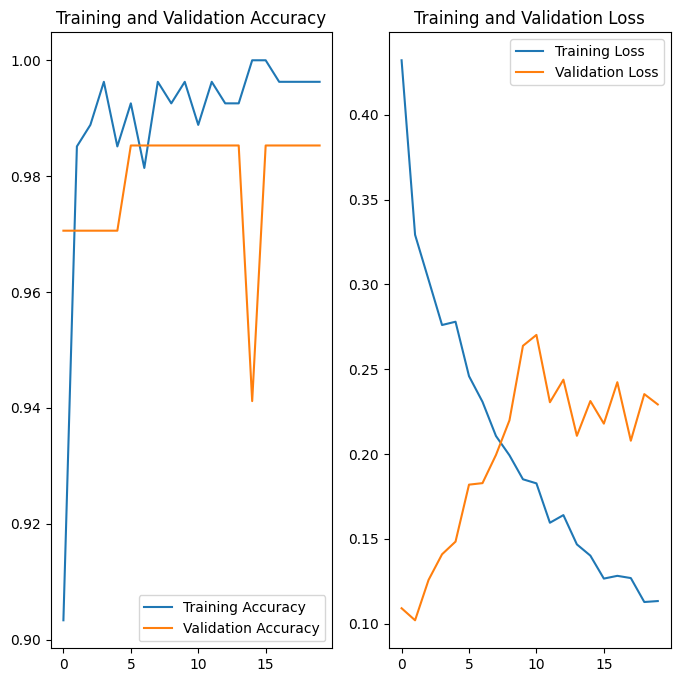

In [42]:
best_epoch = 20 if best_epoch < 20 else best_epoch

hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=.2, verbose=0)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(best_epoch)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
for rep in range(4):
    print('Training data repeats: ', rep)
    nn_acc=[]
    for train, test in KFold(shuffle=True).split(filtered_df_50_arr, label_arr):
        train_rep = np.array(train)
        for i in range(rep):
            train_rep = np.append(train_rep, train)
        ss = StandardScaler()
        rX_train = filtered_df_50_arr[train_rep]
        rX_test = filtered_df_50_arr[test]
        ss.fit(rX_train)
        rX_train = ss.transform(rX_train)
        rX_test = ss.transform(rX_test)
        ry_train = label_arr[train_rep]
        ry_test = label_arr[test]
        hypermodel = tuner.hypermodel.build(best_hps)
        hypermodel.fit(rX_train, ry_train, epochs=best_epoch, validation_split=.2, verbose=0)
        nn_acc.append(hypermodel.evaluate(rX_test, ry_test)[1])
    print(np.mean(nn_acc))

Training data repeats:  0
3/3 [==============================] - 0s 14ms/step - loss: 0.1729 - accuracy: 0.9643
0.9549579858779907
Training data repeats:  1
3/3 [==============================] - 0s 9ms/step - loss: 0.2142 - accuracy: 0.9405
0.966750705242157
Training data repeats:  2
3/3 [==============================] - 0s 8ms/step - loss: 0.2305 - accuracy: 0.9286
0.959635853767395
Training data repeats:  3
3/3 [==============================] - 0s 8ms/step - loss: 0.0340 - accuracy: 0.9881
0.9668067216873169


In [44]:
print(hypermodel.layers[3].rate, hypermodel.layers[7].rate, K.eval(hypermodel.optimizer.lr))

0.3 0.0 0.01


# Logistic Regression

In [45]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math

### Base

In [46]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())
print(cv, np.mean(cv))

[0.96470588 0.94117647 0.96428571 0.97619048 0.95238095] 0.9597478991596639


In [47]:
clf = make_pipeline(StandardScaler(), LogisticRegression())
cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())
print(cv, np.mean(cv))

[0.96470588 0.90588235 0.95238095 0.96428571 0.94047619] 0.945546218487395


### With PCA - 20 features

In [48]:
pca = PCA(n_components=2)
ss = StandardScaler()
pca.fit(ss.fit_transform(filtered_df_20_arr))

PCA(n_components=2)

In [49]:
pca.explained_variance_ratio_

array([0.65568428, 0.06168378])

In [50]:
pca_arr = pca.transform(ss.fit_transform(filtered_df_20_arr))

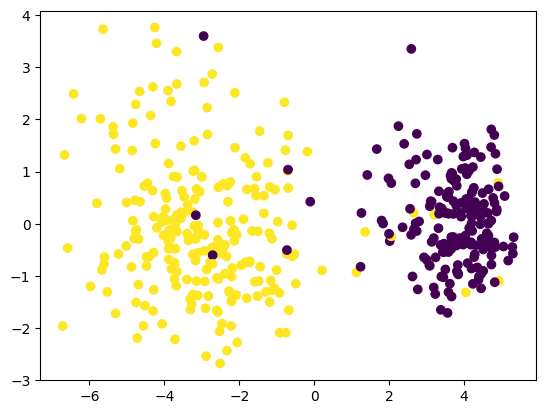

In [51]:
fig = plt.figure()
ax = plt.axes()
#ax.scatter(X_train[:,9], X_train[:,15], X_train[:,17], c=y_train)
ax.scatter(pca_arr[:,0], pca_arr[:,1], c=label_arr)
#ax.scatter(X_test[:,9], X_test[:,15], X_test[:,17], c=np.round(y_pred+2))
plt.show()

In [52]:
clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(solver='liblinear'))
cv = cross_val_score(clf, filtered_df_20_arr, label_arr, cv=StratifiedKFold())

print(cv, np.mean(cv))

[0.96470588 0.97647059 0.97619048 0.96428571 0.96428571] 0.9691876750700279


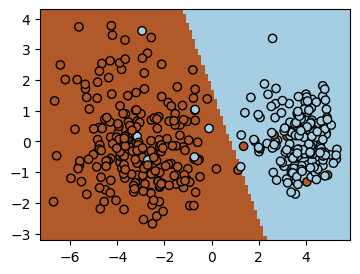

In [53]:
from sklearn.inspection import DecisionBoundaryDisplay

lr = LogisticRegression()
lr.fit(pca_arr, label_arr)
_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    lr,
    pca_arr,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    eps=0.5,
)

# Plot also the training points
plt.scatter(pca_arr[:, 0], pca_arr[:, 1], c=label_arr, edgecolors="k", cmap=plt.cm.Paired)
plt.show()

### With PCA - 50 features

In [54]:
pca = PCA(n_components=2)
ss = StandardScaler()
pca.fit(ss.fit_transform(filtered_df_50_arr))

PCA(n_components=2)

In [55]:
pca_arr50 = pca.transform(ss.fit_transform(filtered_df_50_arr))

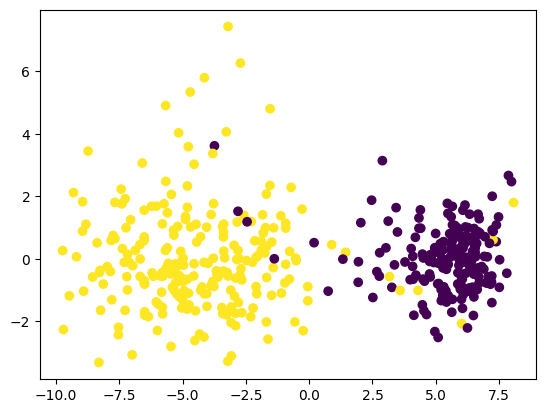

In [56]:
fig = plt.figure()
ax = plt.axes()
#ax.scatter(X_train[:,9], X_train[:,15], X_train[:,17], c=y_train)
ax.scatter(pca_arr50[:,0], pca_arr50[:,1], c=label_arr)
#ax.scatter(X_test[:,9], X_test[:,15], X_test[:,17], c=np.round(y_pred+2))
plt.show()

In [57]:
clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(solver='liblinear'))
cv = cross_val_score(clf, filtered_df_50_arr, label_arr, cv=StratifiedKFold())

print(cv, np.mean(cv))

[0.96470588 0.97647059 0.96428571 0.97619048 0.95238095] 0.9668067226890755


In [58]:
# TODO: Remove outliers before the clustering (after PCA) (ignoring the classes of the data points)
# PCA but use 50 feature dataset

In [59]:
def reject_outliers(data, target, m=2):
    mask = np.all(abs(data - np.mean(data, axis=0)) < 2 * np.std(data, axis=0), axis=1)
    return data[mask].reshape(-1,3), target[mask]

In [60]:
reject_outliers(pca_arr50)

TypeError: reject_outliers() missing 1 required positional argument: 'target'